In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
#  load the data to data frame
data_frame = pd.DataFrame( breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
data_frame['label'] = breast_cancer_dataset.target

In [6]:
data_frame.shape

(569, 31)

In [7]:
#  checking for missing values
data_frame.isnull().sum()
#  return sum of null values in each column

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [9]:
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

 1 -> Benign
 0 -> Malignant

In [14]:
X = data_frame.drop( columns = 'label', axis = 1)
Y = data_frame['label']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state= 2)

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform( X_train)
X_test_std = scaler.transform(X_test)


In [22]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [23]:
model = keras.Sequential( [
    keras.layers.Flatten(input_shape = (30, )),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

In [26]:
model.compile( optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [27]:
history = model.fit( X_train, Y_train, validation_split= 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 2s 50ms/step - loss: 124.5066 - accuracy: 0.3692 - val_loss: 91.1020 - val_accuracy: 0.3478
Epoch 2/10
13/13 [==============================] - 0s 10ms/step - loss: 58.3508 - accuracy: 0.3692 - val_loss: 23.6761 - val_accuracy: 0.3478
Epoch 3/10
13/13 [==============================] - 0s 14ms/step - loss: 8.0697 - accuracy: 0.6406 - val_loss: 5.7691 - val_accuracy: 0.7391
Epoch 4/10
13/13 [==============================] - 0s 9ms/step - loss: 3.9644 - accuracy: 0.8215 - val_loss: 0.3178 - val_accuracy: 0.9130
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 1.2112 - accuracy: 0.8044 - val_loss: 0.0783 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.8545 - accuracy: 0.8973 - val_loss: 0.1267 - val_accuracy: 0.9348
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6204 - accuracy: 0.9046 - val_loss: 0.1660 - val_accuracy: 0.9348
Epoch 8/10
1

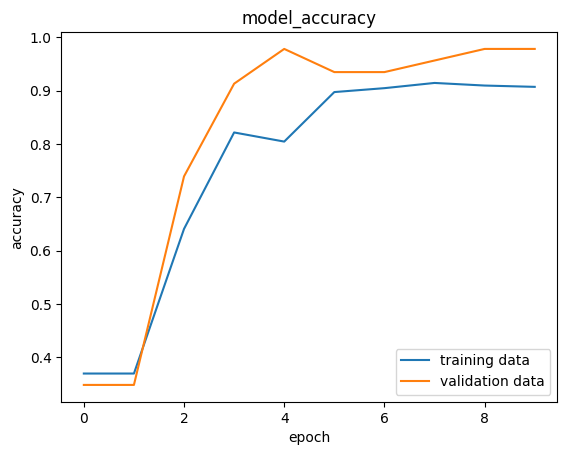

In [29]:
plt.plot( history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title( 'model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend( ['training data', 'validation data'], loc = 'lower right')

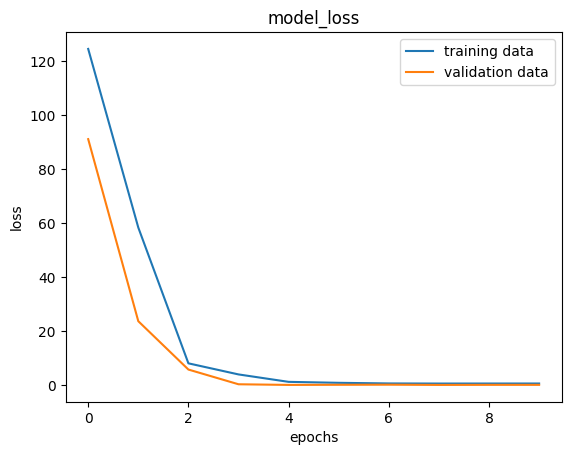

In [32]:
plt.plot(history.history['loss'])
plt.plot( history.history['val_loss'])

plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend( ['training data' ,'validation data'], loc = 'upper right')

In [33]:
loss , accuracy = model.evaluate(X_test_std, Y_test)
print( accuracy)

4/4 [==============================] - 0s 7ms/step - loss: 1.2583 - accuracy: 0.2807
0.28070175647735596


In [34]:
Y_pred = model.predict( X_test_std)

4/4 [==============================] - 0s 4ms/step


In [35]:
Y_pred_labels = ( np.argmax(i) for i in Y_pred)
print( Y_pred_labels)

<generator object <genexpr> at 0x7b1a989ad850>


In [37]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('the tumor is benign')

1/1 [==============================] - 0s 34ms/step
[[0.8056568  0.40776905]]
[0]
The tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
